# DSCI 100 Planning Report  
## Minecraft Server Usage Project  

**Name:** Terrance Wang 

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
players <- read_csv("https://raw.githubusercontent.com/terrancewxngg/dsci100-project-planning/refs/heads/main/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/terrancewxngg/dsci100-project-planning/refs/heads/main/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Data Description
In this project, I am using two datasets, which are players.csv and sessions.csv. Both data sets are based on a research server of Minecraft used by a research team at UBC. The information is seemingly provided automatically through in-game logging actions when the users are playing the server. This is observational data, so it might not be clear how accurate the timestamps can be, or whether all the behaviour is recorded regularly (e.g. in case there are network breaks).

**Players Dataset**

The code below shows that the players dataset has 196 observations and 7 variables. Each row matches to a unique player.

***Players Dataset Variables***

experience (chr): reported skill level of player.

subscribe (lgl): whether the player subscribed to the newsletter.

hashedEmail (chr): anonymous identifier used to link both datasets.

played_hours (dbl): total number of hours the player has logged.

name (chr): player username.

gender (chr): gender of player.

Age (dbl): age of player in years.

In [6]:
dim(players)
glimpse(players)

[1] 196   7

Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


The code below shows the summary statistics of the quanititative variables.

In [8]:
players %>% 
  summarise(
    mean_played_hours = mean(played_hours, na.rm = TRUE),
    sd_played_hours = sd(played_hours, na.rm = TRUE),
    mean_age = mean(Age, na.rm = TRUE),
    sd_age = sd(Age, na.rm = TRUE)
  ) %>% 
  mutate(across(everything(), round, 2))

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `across(everything(), round, 2)`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”


mean_played_hours,sd_played_hours,mean_age,sd_age
<dbl>,<dbl>,<dbl>,<dbl>
5.85,28.36,21.14,7.39


Below, I checked if there are any missing values. It appears there are 2 missing values from the code under here.

In [11]:
colSums(is.na(players))

experience    subscribe  hashedEmail played_hours         name       gender 
           0            0            0            0            0            0 
         Age 
           2

**Sessions Dataset**

The sessions dataset has 1535 observations and 5 variables. We can see that each row describes a single gameplay session from a player.

***Sessions Dataset Variables***

hashedEmail (chr): links session activity to a specific player.

start_time (chr): session start time (as text.)

end_time (chr): session end time stored. This could also be missing.

original_start_time (dbl): numeric timestamp representing start time.

original_end_time (dbl): numeric timestamp representing end time.

In [15]:
dim(sessions)
glimpse(sessions)

[1] 1535    5

Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…


There are also 2 missing values from running the code below. We can see that in end_time and original_end_time. This could be because of sessions that are still not complete.

In [14]:
colSums(is.na(sessions))

hashedEmail          start_time            end_time original_start_time 
                  0                   0                   2                   0 
  original_end_time 
                  2

**Initial Data Notes**

- Datasets link using hashedEmail. So they will need merging.

- Two timestamp formats in sessions. One of them must be converted to a correct datetime.

- name and hashed identifiers should not be used as predictors (privacy).

- Some variables may need recoding (ex. factors, logical values, etc.).

- Missing end times in sessions may be a sign of incomplete gameplay.

- Observational data may include behavioural bias (like active users appear more often).

**Summary**

- *players* describes each user once; *sessions* logs repeated gameplay.

- Wrangling will be required before modeling (merging, cleaning timestamps, getting features like session counts or average play time).

# Questions

**Broad Question:**
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**Specific Predictive Question:**
Can a player’s age, experience level, and total playtime predict whether they subscribe to the newsletter?

This question uses subscribe as the response variable, with age, experience, and played_hours as explanatory predictors. These factors may show the level of commitment that a player has to the server, which could be connected to subscribing. To make the data ready, I will join the players and sessions datasets using hashedEmail, convert timestamps when necessary, and make the categorical variables factors. After cleaning, I will apply one of the classification techniques which I learned in the course (like k-nearest neighbours) to investigate whether these variables can have a significant influence on subscription behaviour.



# Exploratory Data Analysis and Visualization

*We have already loaded the tidyverse package at the top of the notebook, and the data has already been loaded.*

We will now do a bit of light wrangling. Experience and gender are categorical, so I will convert them to factors.

In [17]:
players <- players |>
  mutate(
    experience = as_factor(experience),
    gender = as_factor(gender)
  )

In [18]:
numeric_means <- players |>
  summarize(across(where(is.numeric), ~round(mean(.x, na.rm = TRUE), 2)))

numeric_means

played_hours,Age
<dbl>,<dbl>
5.85,21.14


We can see:
| Variable       | Mean |
|----------------|------|
| Age            |  21.14 |
| played_hours   |  5.85 |

**Exploratory Visualizations**

Distribution of Player Age

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


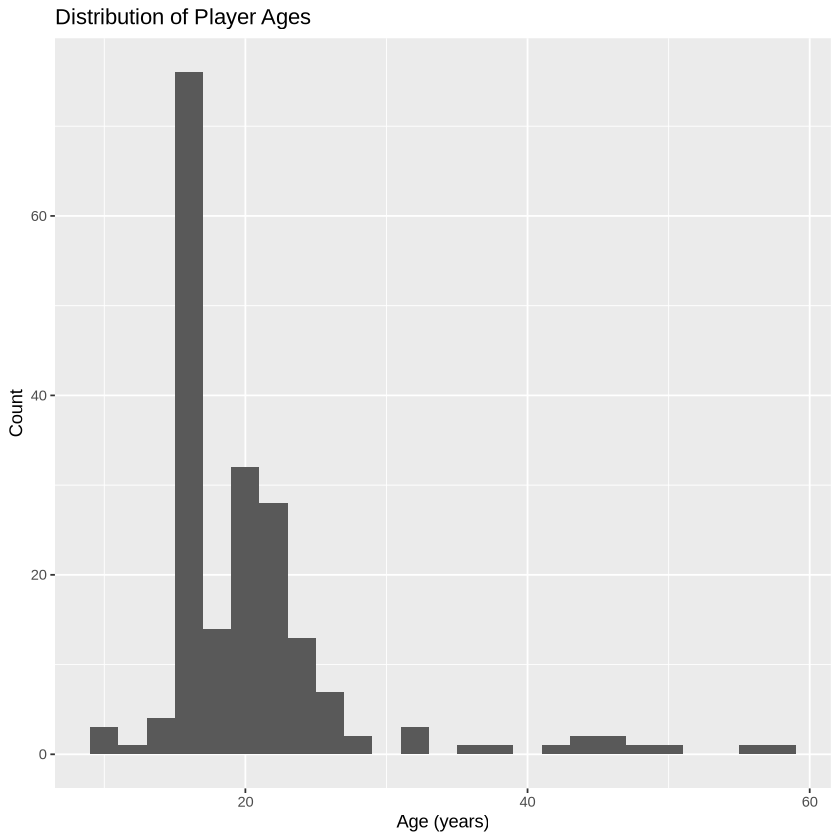

In [19]:
players |>
  ggplot(aes(x = Age)) +
  geom_histogram(binwidth = 2) +
  labs(
    title = "Distribution of Player Ages",
    x = "Age (years)",
    y = "Count"
  )

Looking at the visual, most players are teenagers or young adults (15–25), with a long tail of older players and some missing values. The distribution is clearly right-skewed.

**Hours Played vs Subscription Status**

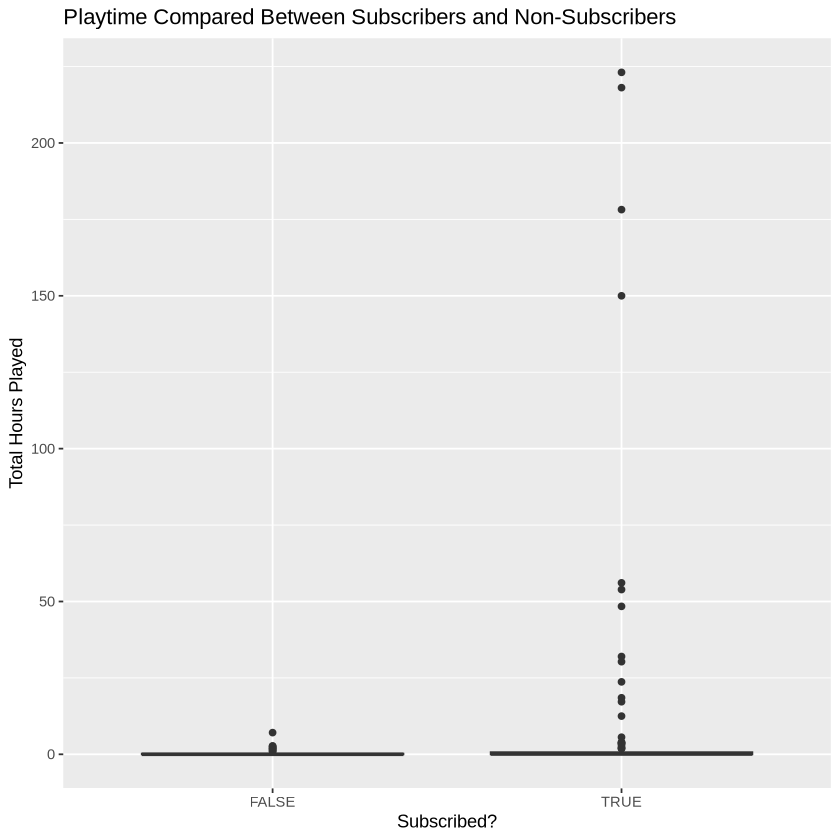

In [21]:
players |>
  ggplot(aes(x = subscribe, y = played_hours)) +
  geom_boxplot() +
  labs(
    title = "Playtime Compared Between Subscribers and Non-Subscribers",
    x = "Subscribed?",
    y = "Total Hours Played"
  )

Based off this it looks like:

- Most players have low total playtime, regardless if they subscribed or not.

- The players with the highest hours played are mainly the ones who subscribed.

- This suggests that players who spend more time in the game may be more likely to subscribe.


**Experience Level by Subscription Status**

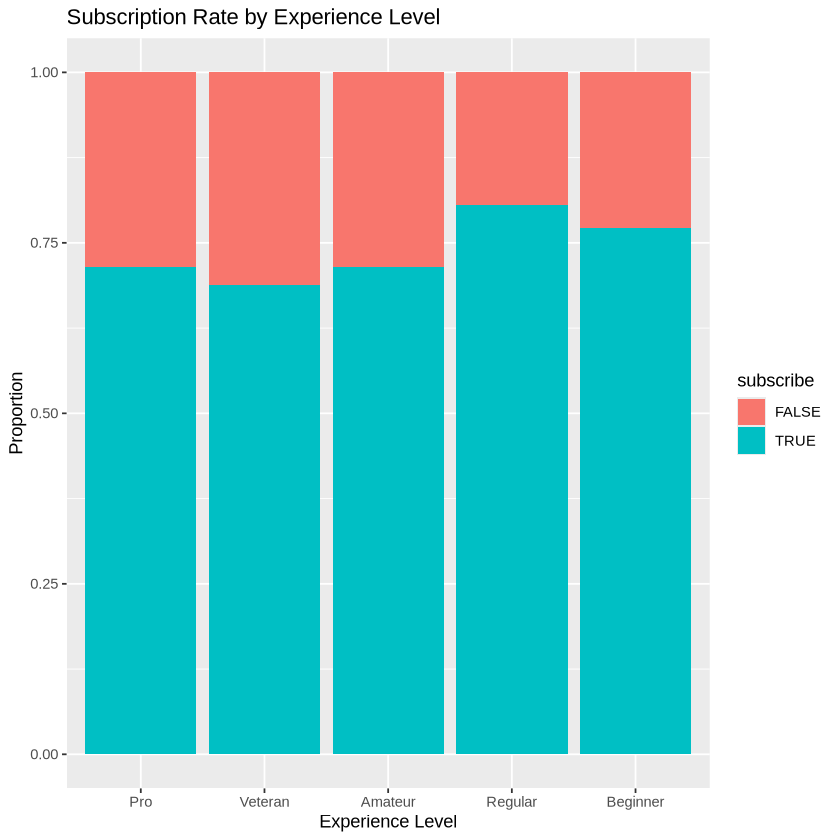

In [22]:
players |>
  ggplot(aes(x = experience, fill = subscribe)) +
  geom_bar(position = "fill") +
  labs(
    title = "Subscription Rate by Experience Level",
    x = "Experience Level",
    y = "Proportion"
  )

The proportions look pretty similar across groups, implying that experience level alone may not strongly predict who subscribes.

**Some Insights**

- Most players in the dataset are younger, and only a few older users appear in the data.

- Players with higher total playtime seem more likely to subscribe, especially those with extreme playtime values.

- Subscription rates are fairly high across all experience levels, with only small differences between groups. This might suggest that experience alone may not strongly determine subscription behaviour.

- The dataset has missing values, especially in timestamps and some age entries. This could affect calculations or model accuracy.

- Since this is observational data, there may very well be hidden factors impacting subscription that aren’t included in the dataset.